# Get Buildings and Streets

Gets buildings and streets layer for visualization in QGIS.

# Import modules

In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
from pathlib import Path

# Choose City

In [2]:
city_list = [
    'Melbourne',
    'Jerusalem',
    'Buenos Aires',
    'Paris',
    'Rotterdam',
    'Nashville',
    'Singapore',
    'Cape Town',
    'New York',
    'Los Angeles',
    'Chicago',
    'Boston',
    'Austin',
    'Seattle',
    'Philadelphia',
    'Pittsburgh',
    'Washington DC',
    'San Francisco',
    'SF Bay Area ',
    'Raleigh',
    'Milwaukee',
    'Portland',
    'San Diego',
    'Denver',
    'Miami',
    'Saint Louis',
    'Houston',
    'Atlanta',
    'Phoenix',
    'Detroit',
    'Minneapolis',
    'Savannah',
    'Charlotte',
    'Las Vegas',
    'Cincinnati',
    'Kansas City',
    'Nashville']


city = city_list[9]
print("City:", city)

City: Los Angeles


# Read Geopackage

In [3]:
data_folder = Path("../data/")
input_file = data_folder / "0_boundaries" / (city + ".gpkg")

gdf = gpd.read_file(input_file, driver='GPKG')
# Force gdf projection
print("Reading:", input_file)
gdf = ox.project_gdf(gdf,to_crs='epsg:4326',to_latlong=False) 

Reading: ../data/admin-levels/Los Angeles.gpkg


<Axes: >

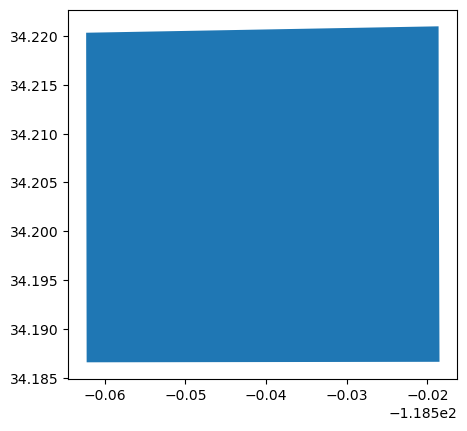

In [4]:
gdf.plot()

# Get Master polygon

In [5]:
# Create unique ID
gdf = gdf.reset_index(drop=True)
gdf['UID'] = gdf.index

# Establish bounds DataFrame (everything so we can do one query)
gdf['collapse'] = 0
gdf_collapsed = gdf.dissolve(by='collapse')

# Get Streets

In [6]:
G = ox.graph_from_polygon(gdf_collapsed['geometry'][0], network_type='drive', retain_all=True) 
out_file = data_folder / "1_buildings_streets" / (city + " - streets.gpkg")
ox.save_graph_geopackage(G, filepath=out_file)
print("Saved:", out_file)

Saved: ../data/city-form/Los Angeles - streets.gpkg


# Get Buildings

In [7]:
tags = {"building": True}
buildings = ox.geometries_from_polygon(gdf_collapsed['geometry'][0], tags)
buildings = buildings[['geometry','name']]
buildings_save = buildings.drop(labels="node", axis=0)

# Save
out_file = data_folder / "1_buildings_streets" / (city + " - buildings.gpkg")
buildings_save.to_file(out_file, driver='GPKG')
print("Saved:", out_file)

/tmp/ipykernel_88963/1735009070.py:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_polygon(gdf_collapsed['geometry'][0], tags)
/tmp/ipykernel_88963/1735009070.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  buildings_save = buildings.drop(labels="node", axis=0)


Saved: ../data/city-form/Los Angeles - buildings.gpkg
